# Pattern Matching

## Bibliotheken und Daten importieren

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import re
from tqdm import tqdm
from my_plot import set_size
import datetime 

%matplotlib inline
tqdm.pandas()
width = 'thesis'

## Stichwörter und Suchfunktion definieren

In [5]:
keywords = {'Allgemein': ["verkehr", "mobilität", "modal[\-\s]*split", "stvo", "höchstgeschwindigkeit", "pendler", ],

            'MIV': [ "miv","automobil", "pkw", "personenkraftw", "kfz", "fahrzeug", "lkw", "lastkraftwagen",
                    "motorrad", "führerschein", "tankstelle", "motorisier"],
            
            'E-Mobilität': ["e[\-\s]*mobilität", "ladesäule", "ladepunkt", "wallbox", "elektroauto", "elektrofahrzeug", 
                            "plug-in-hybrid", "e\-*kennzeichen", "ladeinfrastruktur", "autofrei", "autoarm"],

            'Parken': ["parken", "parkpl", "stellpl", "parkhaus", "garage", "parkraum", "p\s*[\&\+]+\s*r", 
                       "park[\s\-]*[aund\&\+]{0,3}[\s\-]*ride", "ruhender verkehr", "falschpark"],

            'Fahrrad': ["fahrrad", "pedelec" "radverkehr", "schutzstreifen", "radschnell", "radfahr", "radfern", "radstation", 
                        "abstellanlage", "lastenrad", "anlehnbügel", "modaler filter", "bike", "b\s*[\&\+]+\s*r", 
                        "bike[\s\-]*[aund\&\+]{0,3}[\s\-]*ride", "adfc", "allgemeiner[\s\-]*deutscher[\s\-]*fahrrad[\s\-]*club"],

            'Gehen': ["zu fuß", "fußgäng", "gehweg", "zufußgehen", "zebrastreifen", "fuss"],

            'ÖV': ["öpnv", "spnv", "öv", "schienenverkehr", "nahverkehr", "linienbus", "bürgerbus", "regionalbus", "schnellbus",
                   "express[\s\-]*bus", "rufbus", "stadtbus", "anrufsammeltaxi", "tram", "straßenbahn", 
                   "regionalexpress", "haltestelle", "fahrg[aä]st", "fahrplan", "tarifgebiet", "linienplan", 
                   "on[\-\s]*demand",  "rnv", "verkersverbund", "busfahrer", "beförderungsbedingungen", 
                   "fahrschein", "fahrkarte", "ersatzverkehr", "Personenbeförderungsgesetz","PBefG"],
            
            'Neue Mobilität': ["car[\-\s]*sharing", "bike[\-\s]*sharing", "fahrradverleih", "nextbike", "call[\-\s]*a[\-\s]*bike",
                               "\slime\s", "\sbolt\s", "stadtmobil", "roller", "scooter", "fahrgemeinschaft", 
                               "intermodal", "multimodal", "letzte meile", "shared space"]
           }

In [16]:
keywords = {key: sorted(value) for key, value in keywords.items()}

In [18]:
for key, values in keywords.items():
    print(f"{key} : {values},\n")

Allgemein : ['höchstgeschwindigkeit', 'mobilität', 'modal[\\-\\s]*split', 'pendler', 'stvo', 'verkehr'],

MIV : ['automobil', 'fahrzeug', 'führerschein', 'kfz', 'lastkraftwagen', 'lkw', 'miv', 'motorisier', 'motorrad', 'personenkraftw', 'pkw', 'tankstelle'],

E-Mobilität : ['autoarm', 'autofrei', 'e[\\-\\s]*mobilität', 'e\\-*kennzeichen', 'elektroauto', 'elektrofahrzeug', 'ladeinfrastruktur', 'ladepunkt', 'ladesäule', 'plug-in-hybrid', 'wallbox'],

Parken : ['falschpark', 'garage', 'p\\s*[\\&\\+]+\\s*r', 'park[\\s\\-]*[aund\\&\\+]{0,3}[\\s\\-]*ride', 'parken', 'parkhaus', 'parkpl', 'parkraum', 'ruhender verkehr', 'stellpl'],

Fahrrad : ['abstellanlage', 'adfc', 'allgemeiner[\\s\\-]*deutscher[\\s\\-]*fahrrad[\\s\\-]*club', 'anlehnbügel', 'b\\s*[\\&\\+]+\\s*r', 'bike', 'bike[\\s\\-]*[aund\\&\\+]{0,3}[\\s\\-]*ride', 'fahrrad', 'lastenrad', 'modaler filter', 'pedelecradverkehr', 'radfahr', 'radfern', 'radschnell', 'radstation', 'schutzstreifen'],

Gehen : ['fuss', 'fußgäng', 'gehweg', 'zeb

In [325]:
text= df[df['index_doc'] == 41701]['text'].iloc[0]
for key in keywords:
    print(re.findall(pattern='|'.join(keywords[key]), 
                                   string=text,
                                   flags=re.IGNORECASE))

[]
[]
[]
[]
[]
[]
['tram', 'tram']
[]


## Stichwörter suchen und speichern

In [192]:
def search_keywords(string, keywords=keywords):
    keyword_count = {'Allgemein': 0,
                     'MIV': 0,
                     'Parken': 0,
                     'Fahrrad': 0,
                     'Gehen': 0,
                     'ÖV': 0,
                     'Neue Mobilität': 0,}
    
    for key in keywords:
        count = len(re.findall(pattern='|'.join(keywords[key]), 
                               string=string,
                               flags=re.IGNORECASE))
        keyword_count[key] = count
    
    return keyword_count

In [6]:
df = pd.read_parquet('data/raw/2023-06-23_gesamtdaten_rhein_neckar.parquet')

In [271]:
df['stichwörter'] = df['text'].progress_apply(lambda x: search_keywords(x))

100%|█████████████████████████████████████████████████████████████████████████████████| 69131/69131 [28:24<00:00, 40.56it/s]


In [194]:
df.to_parquet('data/raw/2023-06-20_gesamtedaten_rhein_neckar.parquet')

## Visualisierung

### Gesamtanzahl der Stichwortnennungen

#### Häufigkeit im gesamten Datensatz

In [7]:
stichwortgruppen = ['Allgemein', 'MIV', "E-Mobilität", 'Parken', 'Fahrrad', 'Gehen', 'ÖV', 'Neue Mobilität']

In [8]:
# Select only needed info from dataframe and expand 'stichwörter'coloumn
df_slim = df[['index_doc', 'kommune', 'kommunale_ebene', 'datum', 'stichwörter', 'doc_typ', 'beschlussstatus']]
df_slim = df_slim.join(pd.json_normalize(df_slim['stichwörter'])).drop('stichwörter',axis=1)
df_slim["jahr"] = df_slim['datum'].dt.strftime('%Y')

In [9]:
# Aggregate integers
df_stichwörter = df_slim[stichwortgruppen]

In [10]:
df_stichwörter.agg(['sum','mean'])

,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
sum,239999.000000,86325.000000,4666.000000,91804.000000,29570.000000,18934.000000,138317.000000,4040.000000
mean,3.495318,1.257227,0.067955,1.337023,0.430654,0.275753,2.014433,0.058838


In [206]:
set_size(width)

(6.299212813062128, 3.893127620841233)

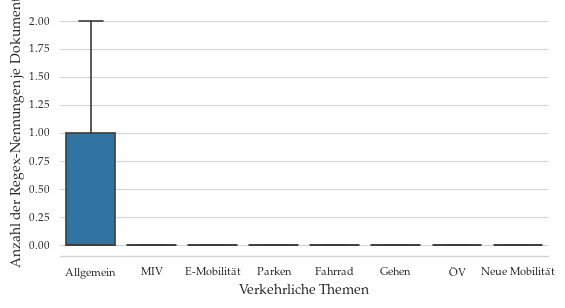

In [208]:
# boxplot of occurances in documents
fig, ax = plt.subplots(1, 1, figsize=(6.299212813062128, 3.2))

sns.set_style("whitegrid")
plt.style.use('tex.mplstyle')
ax = sns.boxplot(data=df_stichwörter, showfliers=False)
ax.set(xlabel='Verkehrliche Themen', ylabel='Anzahl der Regex-Nennungen je Dokument')
# ax.set_ylim([0, 3])
sns.despine(left=True)

fig.savefig('../../latex/Figures/plots/pattern_matching_nennungen_boxplot.pdf', format='pdf', bbox_inches='tight')

Notizen:
* Boxplot ist wenig aussagekräftig

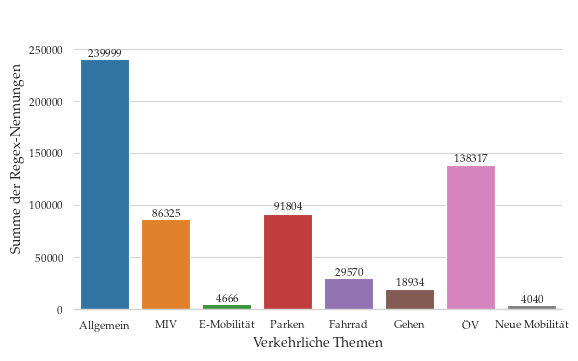

In [23]:
# Sume within all documents
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
ax = sns.barplot(df_stichwörter.agg(['sum']))
ax.set(xlabel='Verkehrliche Themen', ylabel='Summe der Regex-Nennungen')
sns.despine(left=True)

for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)

fig.savefig('../../latex/Figures/plots/pattern_matching_summe_regex_verkehr.pdf', format='pdf', bbox_inches='tight')

Notizen:
* Verhältnismäßig viele Nennungen in der Stichwortgruppe ÖPNV
* Sehr wenig Nennungen im Bereich der neuen Mobilität
* Parken hat sehr viele Nennungen
* Gehen wird kaum genannt
* Parken, Fahrrad und ÖV dominieren

#### Zeitliche Häufigkeit der Stichwortnennung

In [15]:
df_total_per_year = df_slim.groupby('jahr', as_index=False)[stichwortgruppen].sum()

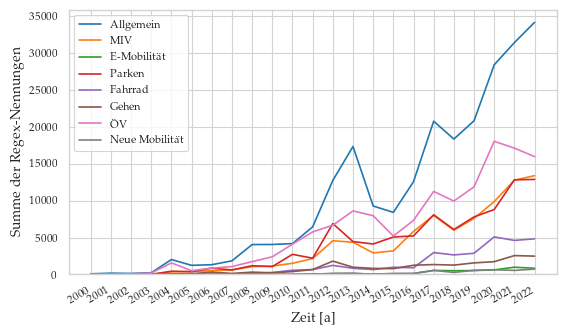

In [48]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.style.use('tex.mplstyle')
sns.lineplot(x='jahr' ,y='value', data=pd.melt(df_total_per_year, id_vars='jahr'), hue='variable')
fig.autofmt_xdate()
ax.set(xlabel='Zeit [a]', ylabel='Summe der Regex-Nennungen')
ax.set_ylim(bottom=0)

ax.legend_.set_title(None)

fig.savefig('../../latex/Figures/plots/pattern_matching_gesamt_jahr_verkehr.pdf', format='pdf', bbox_inches='tight')

In [280]:
fig = px.line(df_total_per_year, 
              x=df_total_per_year.index,
              y=df_total_per_year.columns,
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "value": "Häufigkeit",
                     "variable": "Stichwortgruppen"},
              # line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Noitzen:
* Neue Mobilität und Gehen sind Stichwortgruppen, die sehr wenig Nennungen haben. Es kann keine zeitliche Entwicklung beobachtet werden
* Allgemein und MIV haben einen leicht positiven Trend
* Fahrrad hat einen positiven Trend
* ÖV und Parken domieren 

#### Häufigkeiten nach Kommunen

In [18]:
temp_list = ['kommune'] + stichwortgruppen
df_kommune_gesamt = df_slim[temp_list].groupby('kommune').sum()

df_kommune_gesamt_transpone = df_kommune_gesamt.T

df_kommune_gesamt_transpone_percent = (df_kommune_gesamt_transpone / df_kommune_gesamt_transpone.sum()) * 100

df_kommune_gesamt_percent = df_kommune_gesamt_transpone_percent.T

In [19]:
kommunen_order = ['Bad Dürkheim', 'Bad Friedrichshall', 'Bad Rappenau', 'Bensheim',
       'Frankenthal', 'Hassloch', 'Heppenheim', 'Hockenheim', 'Homburg',
       'Lampertheim', 'Landau', 'Leimen', 'Pirmasens', 'Schwetzingen',
       'Schifferstadt', 'Speyer', 'Viernheim', 'Weinheim', 'Wiesloch',
       'Wörth am Rhein', 'Kreis Bad Dürkheim', 'Kreis Bergstraße',
       'Kreis Germersheim', 'Kreis Heilbronn', 'Rhein-Neckar-Kreis',
       'Rhein-Pfalz-Kreis', 'Saarpfalz-Kreis']
kommunen_label = ['Bad Dürkheim', 'Bad Friedrichshall', 'Bad Rappenau', 'Bensheim',
       'Frankenthal', 'Hassloch', 'Heppenheim', 'Hockenheim', 'Homburg',
       'Lampertheim', 'Landau', 'Leimen', 'Pirmasens', 'Schwetzingen',
       'Schifferstadt', 'Speyer', 'Viernheim', 'Weinheim', 'Wiesloch',
       'Wörth am Rhein', 'Kreis Bad Dürkheim', 'Kreis Bergstraße',
       'Kreis Germersheim', 'Kreis Heilbronn', 'Rhein-Neckar-Kreis',
       'Rhein-Pfalz-Kreis', 'Saarpfalz-Kreis']

In [21]:
df_kommune_gesamt_percent.reset_index(inplace=True)

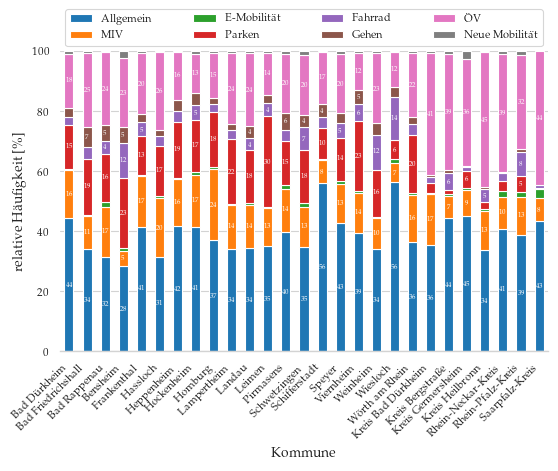

In [134]:
ax = df_kommune_gesamt_percent.set_index('kommune').loc[kommunen_order].plot(kind = 'bar', stacked = True, figsize=set_size(width))

plt.xlabel ("Kommune")
plt.ylabel ("relative Häufigkeit [\%]")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(kommunen_label, rotation = 45, ha='right')
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)
sns.despine(left=True)
ax.set(ylim=(0, 100))


for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=5)

fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/pattern_matching_gesamt_relative_haeufigkeit_verkehr.pdf', format='pdf', bbox_inches='tight')

In [282]:
fig = px.bar(df_kommune_gesamt_percent, 
             # color=df_kommune_gesamt.index,
              # line_group='kommunale_ebene',''
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Relative Häufigkeit (%)"},
              # render_mode="svg",
              template='plotly_white',
              # barnorm = "percent",
              width=800, 
              height=400
             )
fig.show()

Notizen:
* ÖV hat bei allen Kommunen einen großen Anteil
* Parken hat ebenfalls bei allen Kommunen einen großen Anteil
* kreis Heilbronn und Kreis Germersheim haben verhältnismäßig hohen Anteil von Fahrradbegriffen
* Elektromobilität, Gehen und Neue Mobilität hat bei allen Kommunen einen sehr geringen Anteil
* Wiesloch hat bei den Allgemeinen Suchbegriffen einen großen Anteil

In [283]:
fig = px.bar(df_kommune_gesamt,
             x=df_kommune_gesamt.index,
             y=['Allgemein', 'MIV', 'Parken', 'Fahrrad', 'Gehen', 'ÖV', 'Neue Mobilität'],
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notizen:
* MIV weist bei manchen Kommunen (Frankenthal, Lampertheim, Landau, Speyer) einen minimal größeren Anteil auszumachen
* ÖV bei allen Kommunen verhältnismäßig viel genannt
* schlechte Darstellung

In [53]:
temp = ['jahr', 'kommune', 'kommunale_ebene'] + stichwortgruppen
df_kommune_per_year = df_slim[temp].groupby(['jahr', 'kommunale_ebene','kommune']).sum()

df_kommune_per_year['Gesamt'] = df_kommune_per_year[stichwortgruppen].sum(axis = 1)

df_kommune_per_year = df_kommune_per_year.reset_index()

In [54]:
fallbeispiele = ['Frankenthal', 'Schwetzingen', 'Lampertheim', 'Kreis Bergstraße']

In [55]:
df_bsp_per_year = df_kommune_per_year[df_kommune_per_year['kommune'].isin(fallbeispiele)]

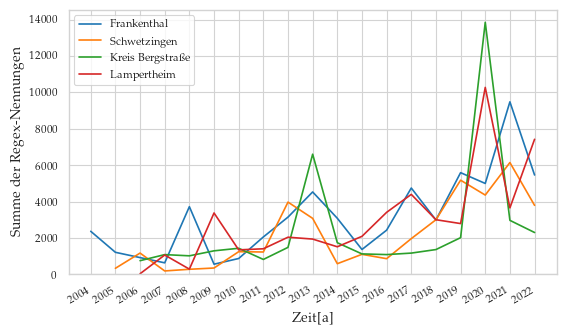

In [56]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.style.use('tex.mplstyle')
sns.lineplot(x='jahr' ,y='Gesamt', data=df_bsp_per_year, hue='kommune')
fig.autofmt_xdate()
ax.set(xlabel='Zeit[a]', ylabel='Summe der Regex-Nennungen')
ax.set_ylim(bottom=0)

ax.legend_.set_title(None)

fig.savefig('../../latex/Figures/plots/pattern_matching_gesamt_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

#### Vergleich ausgewählter Kommunen

In [285]:
fig = px.line(df_kommune_per_year, 
              x='jahr', 
              y='Gesamt', 
              color='kommune',
              line_group='kommunale_ebene',
              hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Noitzen:
* Speyer und Landau haben 2016 und 2017 viele Treffer
* positiver Trend bei den ausgewählten Kommunen

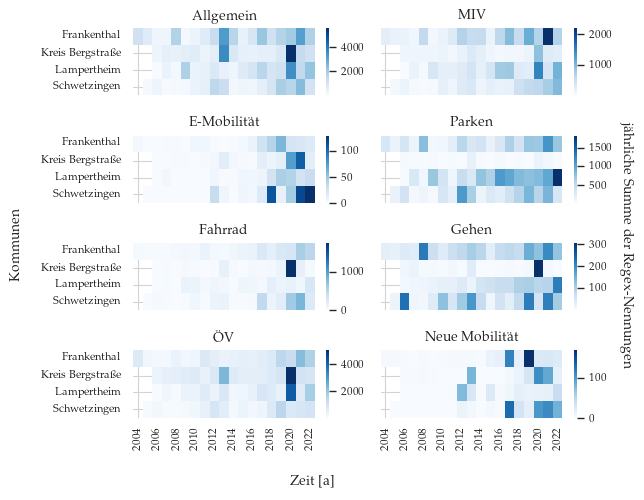

In [245]:
fig, axes = plt.subplots(4, 2, figsize=(6.299212813062128, 5), sharex=True, sharey=True)

for ax, attr in zip(axes.ravel(), stichwortgruppen):
    # filter df for ticker and plot on specified axes
    bsp_heatmap = df_bsp_per_year.pivot_table(index='kommune', columns='jahr', values=attr)
    sns.heatmap(data=bsp_heatmap, ax=ax, cmap='Blues')
    ax.set_title(attr, fontsize = 10)
    ax.set(xlabel=None, ylabel=None)

fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Kommunen', fontsize=10)

# use fig-level text as pseudo-supylable for right-axis
fig.text(x=1, y=0.5, s="jährliche Summe der Regex-Nennungen", size=10, fontweight='bold', rotation=270, ha='center', va='center')


fig.tight_layout()
fig.savefig('../../latex/Figures/plots/pattern_matching_heatmaps_gesamt_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

In [286]:
kommunen_liste = df_kommune_per_year['kommune'].unique().tolist()

def headmap_kommunen(attr: str, kommunen: list = kommunen_liste):

    
    df_kommune_per_year_selected = df_kommune_per_year[df_kommune_per_year['kommune'].isin(kommunen)]
    df_gesamt_pivot = df_kommune_per_year_selected.pivot_table(index='kommune', columns='jahr', values=attr)
    
    fig = go.Figure(data = go.Heatmap(
                           df_to_plotly(df_gesamt_pivot),
                           type = 'heatmap',
                           colorscale = 'blues'
        ))

    fig_height = len(kommunen)*80

    fig.update_layout(
        title=attr,
        template='plotly_white',
        autosize=False,
        width=600,
        height=fig_height,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        yaxis=dict(visible=True,autorange='reversed')
    )
    return fig.show()

def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

In [287]:
headmap_kommunen('Neue Mobilität', ['Frankenthal', 'Schwetzingen', 'Lampertheim', 'Kreis Bergstraße'])

Notizen:

Allgemein:
* Keine klaren Tendenzen erkennbar

MIV:
* nimmt bei allen Kommunen etwas zu

E-Mobilität:
* E-Mobilität etwas über die Zeit wird in Schwetzingen, Speyer, Viernheim
* Bei allen nimmt es tendenziell erst zu
* Bei Frankenthal zum Ende wieder ab

Parken:
* Parken ist über viele Jahre hinweg schon ein wichtiges Thema
* Nimmt tendenziell zu

Fahrrad:
* Fahrrad ist über viele Jahre hinweg schon ein wichtiges Thema
* Nimmt tendenziell zu

Gehen:
* keine Muster erkennbar

ÖV:
* ÖV ist über viele Jahre hinweg schon ein wichtiges Thema
* Nimmt tendenziell zu

Neue Mobilität:
* keine Muster erkennbar


##### Frankenthal

In [93]:
temp_list = ['jahr'] + stichwortgruppen
df_frankenthal_per_year = df_kommune_per_year[df_kommune_per_year['kommune']=='Frankenthal'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

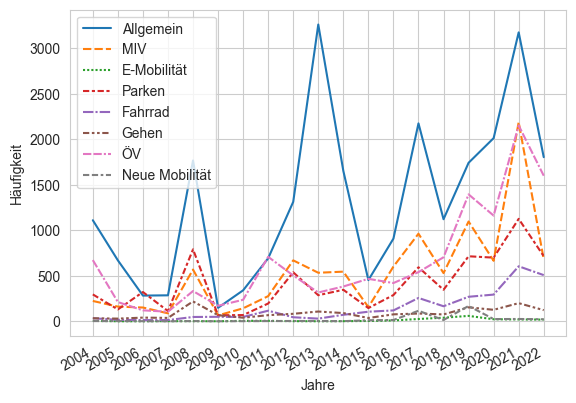

In [289]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_frankenthal_per_year)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

Noitzen:
* ÖV und Parken stechen heraus

##### Schwetzingen

In [94]:
df_schwezingen_per_year = df_kommune_per_year[df_kommune_per_year['kommune']=='Schwetzingen'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

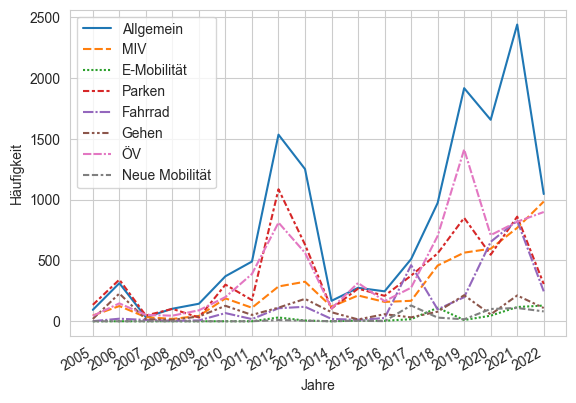

In [291]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_schwezingen_per_year)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Lampertheim

In [95]:
df_lampertheim_per_year = df_kommune_per_year[df_kommune_per_year['kommune']=='Lampertheim'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

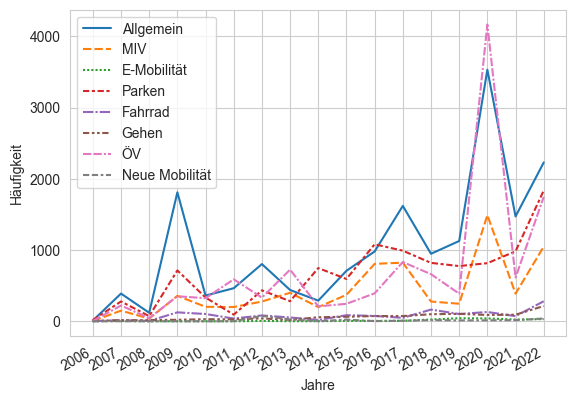

In [293]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_lampertheim_per_year)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Landkreis Bergstraße

In [96]:
df_lk_bergstrasse_per_year = df_kommune_per_year[df_kommune_per_year['kommune']=='Kreis Bergstraße'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

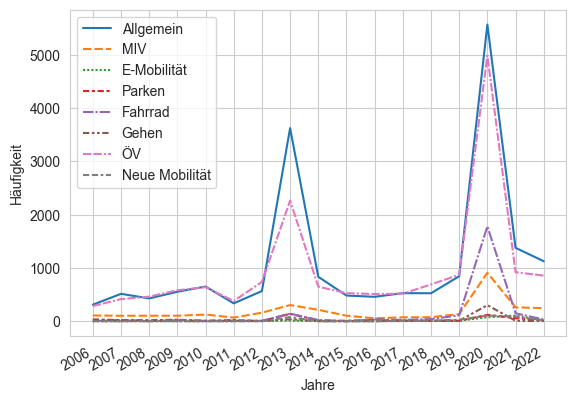

In [295]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_lk_bergstrasse_per_year)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Ausgewählte Kommunen auf einen Blick

In [113]:
df_bsp_per_year['datum_jahr'] = pd.to_datetime(df_bsp_per_year.jahr)

C:\Users\johan\AppData\Local\Temp\ipykernel_24396\589472909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsp_per_year['datum_jahr'] = pd.to_datetime(df_bsp_per_year.jahr)


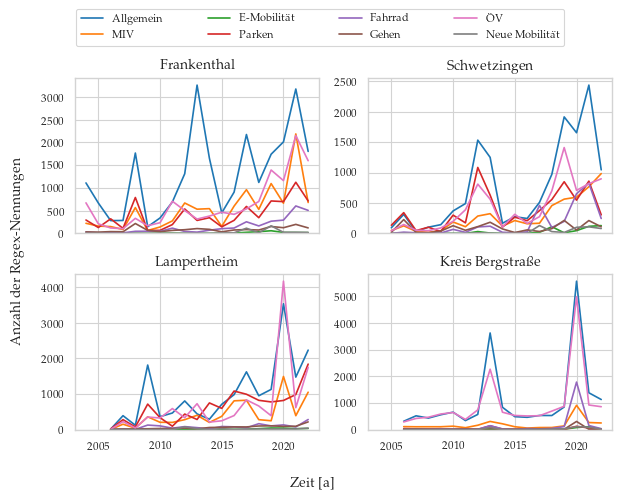

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(6.299212813062128, 4.893127620841233), sharex=True)
temp_list = ['jahr'] + stichwortgruppen                  
for fallbeispiel, ax in zip(fallbeispiele, axes.ravel()):
    # filter df for ticker and plot on specified axes
    df_bsp_per_year[df_bsp_per_year["kommune"] == fallbeispiel][temp_list].plot(x='jahr', ax=ax)

    # chart formatting
    ax.set_title(fallbeispiel, fontsize = 10)
    ax.get_legend().remove()
    ax.set(xlabel=None, ylabel=None)
    ax.set_ylim(bottom=0)

bb = (fig.subplotpars.left, fig.subplotpars.top+0.04, 
      fig.subplotpars.right-fig.subplotpars.left,.1)
# fig.autofmt_xdate()
axes[0][0].legend(bbox_to_anchor=bb, mode="expand", loc="lower left",
               ncol=4, borderaxespad=0., bbox_transform=fig.transFigure)
plt.style.use('tex.mplstyle')
fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Anzahl der Regex-Nennungen', fontsize=10)

fig.tight_layout()
fig.savefig('../../latex/Figures/plots/pattern_matching_verkehr_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

Notizen:
* Bei allen dominieren ÖV und Parken

Frankenthal:
* Bei Frankenthal ab 2017 deutlicher Zuwachs

Schwetzingen:
* Bereits 2012 gab es viele Trefefn bei den den Stichwortgruppen ÖV, Parken, Fahrrad und Allgemein
* Bis 2014 wieder abgenommen und ab dann wieder zugenommen

Lampertheim:
* Ab 2016 nehmen ÖV, Parken und Fahrrad deutlich zu

Landkreis Bergstraße:
* Es gibt eindeutige Spitzen zu erkennen
* 2010 Parken
* 2013 ÖV und Allgemein
* 2020 Allgemein, ÖV, Parken und Fahrradm


### Stichwortnennungen nach Dokumenten

In [63]:
# convertion int to boolean
df_slim_count = df_slim
df_slim_count[stichwortgruppen] = df_slim_count[stichwortgruppen].astype(bool)
df_slim_count['Gesamt'] = [any(row) for row in df_slim_count[stichwortgruppen].to_numpy()]

# Aggregate integers
df_count_stichwörter = df_slim[stichwortgruppen]

In [197]:
df_slim_count.groupby('kommune')[stichwortgruppen].sum()

,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
kommune,,,,,,,,
Bad Dürkheim,560,352,26,352,137,154,369,33
Bad Friedrichshall,405,126,7,218,47,120,364,8
Bad Rappenau,321,240,41,247,105,147,283,12
Bensheim,49,27,9,47,39,27,45,9
Frankenthal,1777,894,94,980,493,526,1308,115
Hassloch,713,403,37,396,177,143,579,23
Heppenheim,916,481,41,549,209,318,687,20
Hockenheim,558,213,50,411,153,193,280,25
Homburg,94,36,16,59,31,26,72,23


#### Häufigkeit im gesamten Datensatz

In [198]:
df_count_stichwörter.agg(['sum','mean'])

,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
sum,17702.00000,9070.000000,1422.00000,9470.00000,4662.000000,4719.000000,13663.000000,1026.000000
mean,0.25781,0.132094,0.02071,0.13792,0.067897,0.068727,0.198986,0.014943


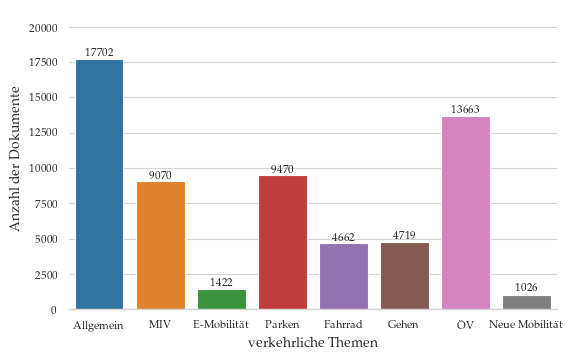

In [96]:
# Sum within all documents
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# sns.set_style('whitegrid')
plt.style.use('tex.mplstyle')
ax = sns.barplot(df_count_stichwörter.agg(['sum']))
ax.set(xlabel='verkehrliche Themen', ylabel='Anzahl der Dokumente')
sns.despine(left=True)

for c in ax.containers:
    # add custom labels with the labels=labels parameter if needed
    # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', fontsize=8)
ax.margins(y=0.2)

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_regex_verkehr.pdf', format='pdf', bbox_inches='tight')

Notizen:
* Parken und ÖV werden in den meisten Dokuemnten thematisiert

#### Zeitreihen

In [132]:
df_total_count_per_year = df_slim.groupby('jahr', as_index=False)[stichwortgruppen].sum()

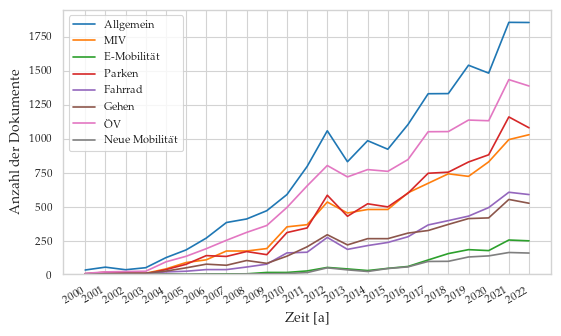

In [133]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

sns.lineplot(x='jahr' ,y='value', data=pd.melt(df_total_count_per_year, id_vars='jahr'), hue='variable')
ax.set(xlabel='Zeit [a]', ylabel='Anzahl der Dokumente')

ax.set_ylim(bottom=0)
ax.legend_.set_title(None)
fig.autofmt_xdate()
plt.style.use('tex.mplstyle')

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_gesamt_jahr_verkehr.pdf', format='pdf', bbox_inches='tight')

In [303]:
fig = px.line(df_total_count_per_year, 
              x=df_total_count_per_year.index,
              y=df_total_count_per_year.columns,
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "value": "Häufigkeit",
                     "variable": "Stichwortgruppen"},
              # line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notizen:
* Durchweg positiver Trend
* Parken, ÖV und Fahrrad dominieren

#### Nach Kommunen

In [67]:
temp = ['jahr', 'kommune', 'kommunale_ebene', 'Gesamt'] + stichwortgruppen
df_kommune_per_year_count = df_slim_count[temp].groupby(['jahr', 'kommunale_ebene','kommune'], as_index=False).sum()

In [68]:
df_bsp_count_per_year = df_kommune_per_year_count[df_kommune_per_year_count['kommune'].isin(fallbeispiele)]

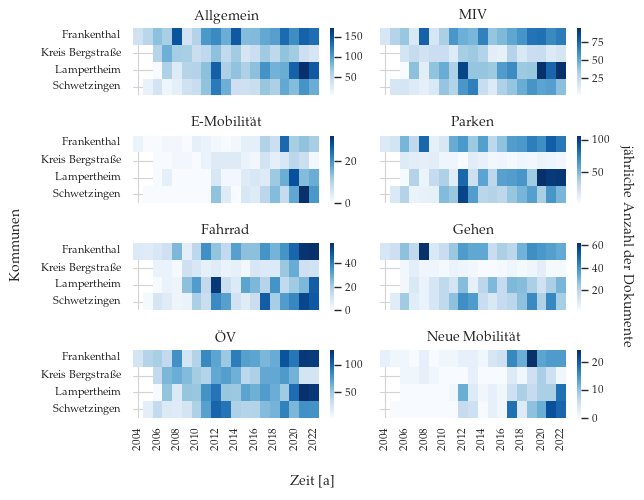

In [246]:
fig, axes = plt.subplots(4, 2, figsize=(6.299212813062128, 5), sharex=True, sharey=True)

for ax, attr in zip(axes.ravel(), stichwortgruppen):
    # filter df for ticker and plot on specified axes
    bsp_heatmap = df_bsp_count_per_year.pivot_table(index='kommune', columns='jahr', values=attr)
    sns.heatmap(data=bsp_heatmap, ax=ax, cmap='Blues')
    ax.set_title(attr, fontsize = 10)
    ax.set(xlabel=None, ylabel=None)

fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Kommunen', fontsize=10)

# use fig-level text as pseudo-supylable for right-axis
fig.text(x=1, y=0.5, s="jährliche Anzahl der Dokumente", size=10, fontweight='bold', rotation=270, ha='center', va='center')


fig.tight_layout()
fig.savefig('../../latex/Figures/plots/pattern_matching_heatmaps_docs_gesamt_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

In [304]:
kommunen_liste = df_kommune_per_year['kommune'].unique().tolist()

def headmap_kommunen_count(attr: str, kommunen: list = kommunen_liste):

    
    df_kommune_per_year_selected = df_kommune_per_year_count[df_kommune_per_year_count['kommune'].isin(kommunen)]
    df_gesamt_pivot = df_kommune_per_year_selected.pivot_table(index='kommune', columns='jahr', values=attr)
    
    fig = go.Figure(data = go.Heatmap(
                           df_to_plotly(df_gesamt_pivot),
                           type = 'heatmap',
                           colorscale = 'blues'
        ))

    fig_height = len(kommunen)*80

    fig.update_layout(
        title=attr,
        template='plotly_white',
        autosize=False,
        width=600,
        height=fig_height,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        yaxis=dict(visible=True,autorange='reversed')
    )
    return fig.show()

In [305]:
headmap_kommunen('Neue Mobilität', ['Frankenthal', 'Schwetzingen', 'Lampertheim', 'Kreis Bergstraße'])

Notizen:

MIV:
* Nimmt zu
* Kreis lässt sich nicht so gut erkennen

Parken:
* Auf Kreisebene sehr relevant
* Nimmt zu

E-Mobilität:
* Nimmt zu

Fahrrad:
* über viele Jahr hohe Werte

Gehen:
* Unregelmäßige Muster

ÖV:
* Nimmt zu
* Stets hohe Werte

Neue Mobilität:
* Unregelmäßige Muster

In [71]:
temp_list = ['kommune'] + stichwortgruppen
df_kommune_gesamt_count = df_slim_count[temp_list].groupby('kommune').sum()

df_kommune_gesamt_transpone_count = df_kommune_gesamt_count.T

df_kommune_gesamt_transpone_count_percent = (df_kommune_gesamt_transpone_count / df_kommune_gesamt_transpone_count.sum()) * 100

df_kommune_gesamt_count_percent = df_kommune_gesamt_transpone_count_percent.T

In [72]:
df_kommune_gesamt_count_percent.reset_index(inplace=True)

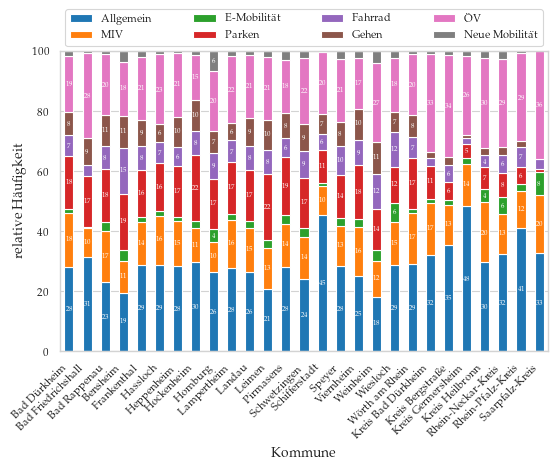

In [127]:
ax = df_kommune_gesamt_count_percent.set_index('kommune').loc[kommunen_order].plot(kind = 'bar', stacked = True, figsize=set_size(width))

plt.xlabel ("Kommune")
plt.ylabel ("relative Häufigkeit")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(kommunen_label, rotation = 45, ha='right')
# plt.legend(ncol=3)

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)
ax.set(ylim=(0, 100))

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=5)

fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_gesamt_relative_haeufigkeit_verkehr.pdf', format='pdf', bbox_inches='tight')

In [128]:
fig = px.bar(df_kommune_gesamt_count_percent, 
             # color=df_kommune_gesamt.index,
              # line_group='kommunale_ebene',''
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

Notizen:
* Saarpfalz-Kreis unterscheidet sich stark von den anderen Kommunen
* Ergebnisse zwischen den Kommunen deutlich homogener als bei Häufigkeit von Nennungen

In [308]:
fig = px.bar(df_kommune_gesamt_count,
             x=df_kommune_gesamt.index,
             y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

In [306]:
df_kommune_per_year_count.to_parquet("data/raw/2023-07-10_pattern_matching_kommune_doc_per_year")

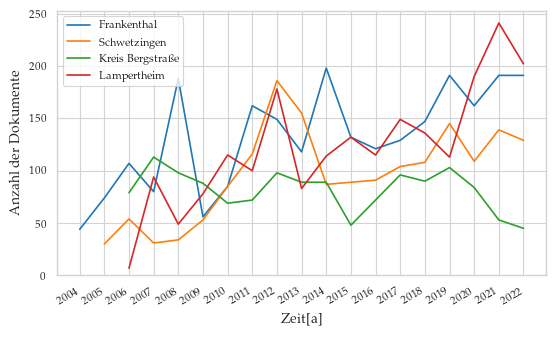

In [222]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.style.use('tex.mplstyle')
sns.lineplot(x='jahr' ,y='Gesamt', data=df_bsp_count_per_year, hue='kommune')
fig.autofmt_xdate()
ax.set(xlabel='Zeit[a]', ylabel='Anzahl der Dokumente')
ax.set_ylim(bottom=0)

ax.legend_.set_title(None)

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_gesamt_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

#### Vergleich ausgewählter Kommunen

In [311]:
fig = px.line(df_kommune_per_year_count, 
              x='jahr', 
              y='Gesamt', 
              color='kommune',
              line_group='kommunale_ebene',
              hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Noitzen:
* Trend ist deutlich weniger ausgeprägt als bei Nennungen
* Bei Kreis Bergstraße sogar rückläufig
* Teilweise eher stagnierend

##### Frankenthal

In [312]:
temp_list = ['jahr'] + stichwortgruppen
df_frankenthal_per_year_count = df_kommune_per_year_count[df_kommune_per_year_count['kommune']=='Frankenthal']
df_frankenthal_per_year_count = df_frankenthal_per_year_count[temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

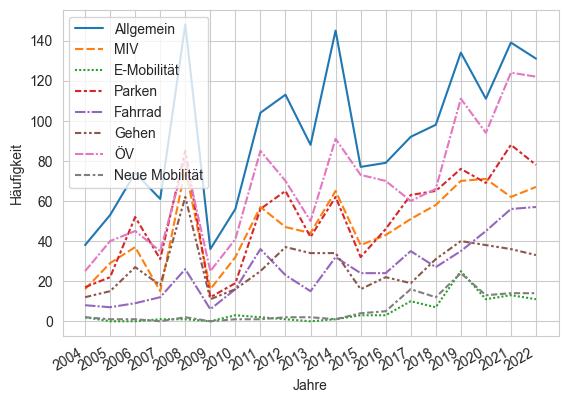

In [313]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_frankenthal_per_year_count)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Schwetzingen

In [314]:
df_schwezingen_per_year_count = df_kommune_per_year_count[df_kommune_per_year_count['kommune']=='Schwetzingen'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

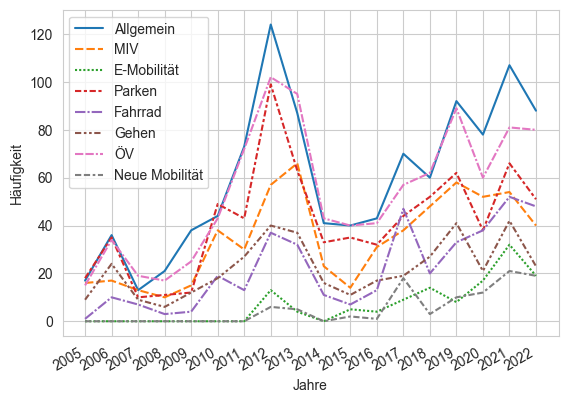

In [315]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_schwezingen_per_year_count)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Lampertheim

In [316]:
df_lampertheim_per_year_count = df_kommune_per_year[df_kommune_per_year_count['kommune']=='Lampertheim'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

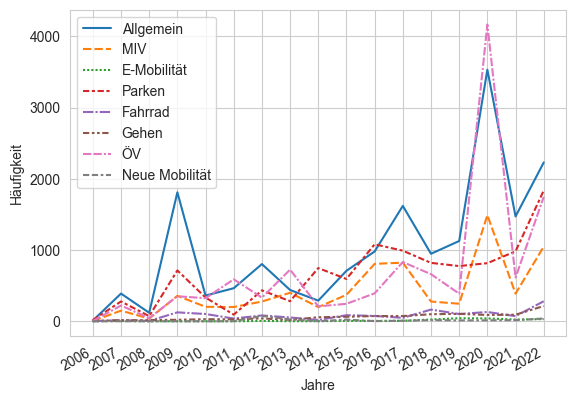

In [317]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_lampertheim_per_year_count)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

##### Landkreis Bergstraße 

In [318]:
df_lk_bergstrasse_per_year_count = df_kommune_per_year_count[df_kommune_per_year_count['kommune']=='Kreis Bergstraße'][temp_list].set_index('jahr')

[Text(0.5, 0, 'Jahre'), Text(0, 0.5, 'Häufigkeit')]

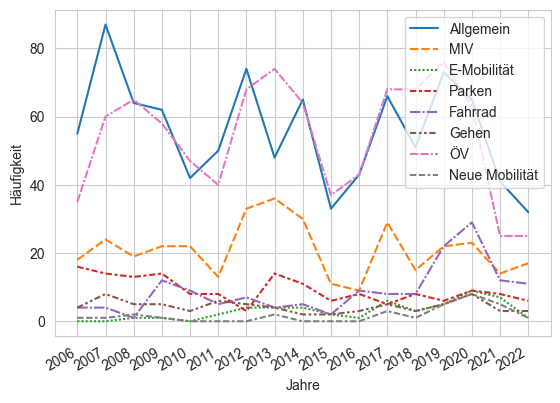

In [319]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.lineplot(data=df_lk_bergstrasse_per_year_count)
fig.autofmt_xdate()
ax.set(xlabel='Jahre', ylabel='Häufigkeit')

In [125]:
df_bsp_count_per_year['jahr_int'] = df_bsp_count_per_year['jahr']. astype(int)

C:\Users\johan\AppData\Local\Temp\ipykernel_24396\1000019544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsp_count_per_year['jahr_int'] = df_bsp_count_per_year['jahr']. astype(int)


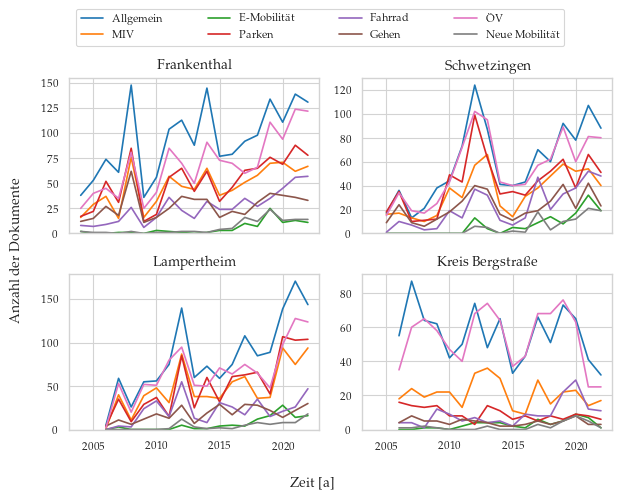

In [129]:
fig, axes = plt.subplots(2, 2, figsize=(6.299212813062128, 4.893127620841233), sharex=True)
temp_list = ['jahr_int'] + stichwortgruppen                  
for fallbeispiel, ax in zip(fallbeispiele, axes.ravel()):
    # filter df for ticker and plot on specified axes
    df_bsp_count_per_year[df_bsp_count_per_year["kommune"] == fallbeispiel][temp_list].plot(x='jahr_int', ax=ax)

    # chart formatting
    ax.set_title(fallbeispiel, fontsize = 10)
    ax.get_legend().remove()
    ax.set(xlabel=None, ylabel=None)
    ax.set_ylim(bottom=0)
    # ax.set_xlim('2006', '2023')

bb = (fig.subplotpars.left, fig.subplotpars.top+0.04, 
      fig.subplotpars.right-fig.subplotpars.left,.1)
# fig.autofmt_xdate()
axes[0][0].legend(bbox_to_anchor=bb, mode="expand", loc="lower left",
               ncol=4, borderaxespad=0., bbox_transform=fig.transFigure)
plt.style.use('tex.mplstyle')
fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Anzahl der Dokumente', fontsize=10)

fig.tight_layout()
fig.savefig('../../latex/Figures/plots/pattern_matching_docs_verkehr_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

##### Ausgewählte Kommunen im Überblick 

Notizen:
* Darstellung ist weniger Extrem
* Landkreis Bergstraße hat sogar abnehmende Werte
* Parken und ÖV sind die Hauptthemen

### Nach Dokumententypen

In [145]:
doc_typ_order = ['Bekanntmachung', 'Vorlage', 'Anfrage', 'Antrag', 'Beschluss', 'Niederschrift',
           'Anhang Sitzung', 'Anhang Vorlage', 'Anhang Beschluss', 'k. A.']
doc_typ_order_new = ['Bekanntmachung', 'Vorlage', 'Anfrage', 'Antrag', 'Beschluss', 'Niederschrift',
           'Anhang Sitzung', 'Anhang Vorlage', 'Anhang Beschluss']
doc_typ_selection_order = ['Bekanntmachung', 'Vorlage', 'Anfrage', 'Antrag', 'Beschluss', 'Niederschrift']

In [239]:
temp_list = ['doc_typ'] + stichwortgruppen
# df_doc_total = df_slim_count[df_slim_count['doc_typ'].isin(doc_typ_selection_order)][temp_list]
df_doc_total = df_slim_count[temp_list]
df_doc_total = df_doc_total.groupby('doc_typ')[stichwortgruppen].sum()
df_doc_total_percent = (df_doc_total / df_doc_total.sum()) *100
df_doc_total_percent_transpone = (df_doc_total / df_doc_total.sum()) *100

In [322]:
fig = px.bar(df_doc_total,
             x=df_doc_total.index,
             y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

In [214]:
df_doc_total_percent_transpone

,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
doc_typ,,,,,,,,
Anfrage,1.278417,1.070181,1.171303,0.981238,1.209855,0.999348,1.025526,0.606061
Anhang Beschluss,1.197432,1.374338,3.367496,0.862627,1.143863,0.477949,1.594431,1.515152
Anhang Sitzung,2.337016,2.782472,4.685212,2.835885,4.157501,2.889420,2.590014,5.252525
Anhang Vorlage,46.595708,54.252563,42.459736,54.561139,48.658161,51.575060,47.114305,46.060606
Antrag,0.919766,0.766025,1.464129,0.657753,1.033876,0.477949,0.838386,1.515152
Bekanntmachung,2.510557,1.295483,1.390922,3.073108,2.881654,1.716272,3.353544,2.727273
Beschluss,3.083242,1.836206,1.171303,1.930127,2.331720,1.890072,2.754697,0.909091
Niederschrift,9.706716,9.834404,17.057101,11.224930,14.320282,13.643276,11.408040,14.646465
Vorlage,32.371146,26.788329,27.232796,23.873194,24.263088,26.330654,29.321057,26.767677


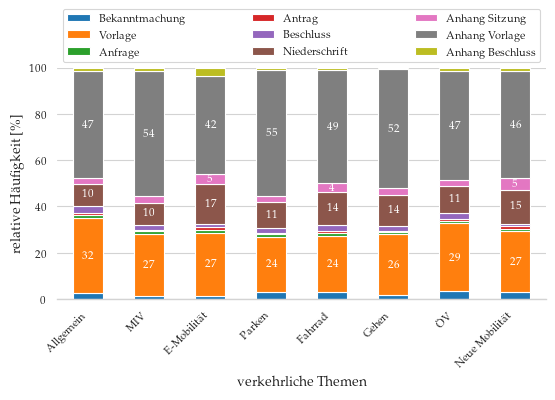

In [241]:
ax = df_doc_total_percent_transpone.loc[doc_typ_order_new].T.plot(kind = 'bar', stacked = True, figsize=(6.299212813062128, 3))

plt.xlabel ("verkehrliche Themen")
plt.ylabel ("relative Häufigkeit [\%]")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(stichwortgruppen, rotation = 45, ha='right')
# plt.legend(ncol=3)

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
ax.set(ylim=(0, 100))
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=8)
sns.despine(left=True)
fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_gesamt_relative_haeufigkeit_verkehr_doc_typ.pdf', format='pdf', bbox_inches='tight')

In [243]:
temp_list = ['doc_typ'] + stichwortgruppen
df_doc_total = df_slim_count[df_slim_count['doc_typ'].isin(doc_typ_selection_order)][temp_list]
df_doc_total = df_doc_total.groupby('doc_typ')[stichwortgruppen].sum()
df_doc_total_percent = (df_doc_total / df_doc_total.sum()) *100
df_doc_total_percent_transpone = (df_doc_total / df_doc_total.sum()) *100

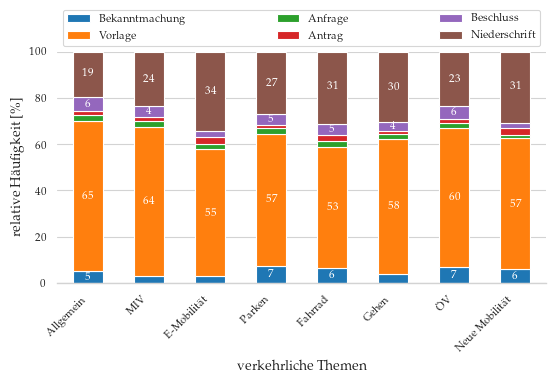

In [244]:
ax = df_doc_total_percent_transpone.loc[doc_typ_selection_order].T.plot(kind = 'bar', stacked = True, figsize=(6.299212813062128, 3))

plt.xlabel ("verkehrliche Themen")
plt.ylabel ("relative Häufigkeit [\%]")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(stichwortgruppen, rotation = 45, ha='right')
# plt.legend(ncol=3)

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
ax.set(ylim=(0, 100))
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=8)
sns.despine(left=True)
fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/pattern_matching_docs_gesamt_relative_haeufigkeit_verkehr_doc_ty_ohne_anhang.pdf', format='pdf', bbox_inches='tight')

In [323]:
fig = px.bar(df_doc_total_percent_transpone.T,
             # x=df_doc_total_percent_transpone.index,
             # y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

In [324]:
fig = px.bar(df_doc_total_percent,
             # x=df_doc_total_percent_transpone.index,
             # y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notizen:
* Vorlagen und Vorlagen Anhäge machen den überwiegenden Teil der Dokumente aus
* Beschlüsse sind nur ein geringer Anteil

In [325]:
df_slim_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69131 entries, 0 to 69130
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index_doc        69131 non-null  int64         
 1   kommune          69131 non-null  object        
 2   kommunale_ebene  69026 non-null  object        
 3   datum            69131 non-null  datetime64[ns]
 4   doc_typ          67601 non-null  object        
 5   beschlussstatus  16280 non-null  object        
 6   Allgemein        69131 non-null  bool          
 7   MIV              69131 non-null  bool          
 8   Parken           69131 non-null  bool          
 9   Fahrrad          69131 non-null  bool          
 10  Gehen            69131 non-null  bool          
 11  ÖV               69131 non-null  bool          
 12  Neue Mobilität   69131 non-null  bool          
 13  E-Mobilität      69131 non-null  bool          
 14  jahr             69131 non-null  objec

In [86]:
temp_list = ['jahr', 'doc_typ', 'kommune'] + stichwortgruppen
df_vorlage = df_slim_count[temp_list]
df_vorlage = df_vorlage[df_vorlage['doc_typ'] == 'Vorlage'].groupby(['jahr', 'kommune'])[stichwortgruppen].sum()
df_vorlage = df_vorlage.reset_index()

In [327]:
df_vorlage

,jahr,kommune,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
0,2000,Schifferstadt,20,3,0,2,2,3,5,0
1,2001,Schifferstadt,24,3,0,5,3,3,6,0
2,2001,Viernheim,4,1,0,3,0,1,2,1
3,2002,Schifferstadt,14,2,0,3,1,2,6,0
4,2002,Viernheim,4,3,0,3,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...
311,2022,Speyer,47,21,8,25,9,17,34,6
312,2022,Viernheim,11,9,1,9,4,8,10,3
313,2022,Weinheim,12,9,3,10,9,8,13,2
314,2022,Wiesloch,141,72,30,61,54,34,91,10


In [328]:
fig = px.line(df_vorlage,
              x='jahr',
              y=stichwortgruppen,
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notizen:
* Ergebnisse analog zu Kommunen

In [329]:
df_vorlage_frankenthal = df_vorlage[df_vorlage['kommune'] == 'Frankenthal']
fig = px.line(df_vorlage_frankenthal,
              x='jahr',
              y=stichwortgruppen,
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              # line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

### Nach Beschlussstatus

In [87]:
beschlussstatus = ['beschlossen','Teilbeschlüsse','abgelehnt', 'zur Kenntnis genommen','zurückgezogen',
                  'vertagt', 'abgesetzt', 'offen']
beschlussstatus_label = ['beschlossen','Teilbeschlüsse','abgelehnt', 'zur Kenntnis\ngenommen','zurückgezogen',
                  'vertagt', 'abgesetzt', 'offen']

In [88]:
df_beschluss = df_slim_count[df_slim_count['beschlussstatus'].notna()]

In [89]:
temp_list = ['beschlussstatus', 'doc_typ'] + stichwortgruppen
df_beschluss_total = df_beschluss[temp_list]
df_beschluss_total = df_beschluss_total[df_beschluss_total['doc_typ'].isin(['Vorlage', 'Beschluss', 'Anfrage', 'Antrag'])]
df_beschluss_total = df_beschluss.groupby('beschlussstatus')[stichwortgruppen].sum()
df_beschluss_total_percent = (df_beschluss_total / df_beschluss_total.sum()) *100
df_beschluss_total_percent = df_beschluss_total_percent.loc[beschlussstatus]
df_beschluss_total = df_beschluss_total.loc[beschlussstatus]

In [269]:
df_beschluss_total_percent

,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
beschlussstatus,,,,,,,,
beschlossen,89.633558,91.339590,83.386581,91.909651,90.049261,90.520446,87.985635,82.989691
Teilbeschlüsse,3.447445,2.943686,7.348243,1.519507,1.773399,1.765799,4.635978,5.154639
abgelehnt,0.964320,0.767918,1.277955,0.985626,1.379310,1.394052,1.077375,2.061856
zur Kenntnis genommen,4.532305,3.839590,7.028754,4.065708,5.221675,4.646840,5.223637,9.278351
zurückgezogen,0.072324,0.000000,0.000000,0.041068,0.000000,0.000000,0.032648,0.000000
vertagt,1.084860,0.853242,0.638978,1.232033,0.689655,1.208178,0.783546,0.000000
abgesetzt,0.096432,0.085324,0.000000,0.041068,0.197044,0.092937,0.097943,0.515464
offen,0.168756,0.170648,0.319489,0.205339,0.689655,0.371747,0.163239,0.000000


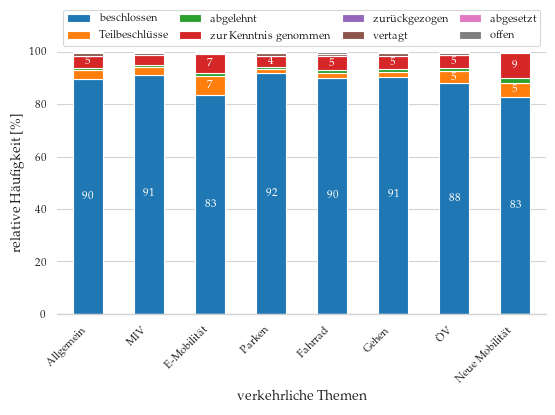

In [231]:
ax = df_beschluss_total_percent.T.plot(kind = 'bar', stacked = True, figsize=(6.299212813062128, 3.4))

plt.xlabel ("verkehrliche Themen")
plt.ylabel ("relative Häufigkeit [\%]")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(stichwortgruppen, rotation = 45, ha='right')
# plt.legend(ncol=3)

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)

ax.set(ylim=(0, 100))
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=8)
sns.despine(left=True)

fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/pattern_matching_verkehr_beschluss.pdf', format='pdf', bbox_inches='tight')

In [151]:
fig = px.bar(df_beschluss_total_percent.T,
             # x=df_doc_total_percent_transpone.index,
             # y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notiz:
* Abgebildet sind keine Anhänge
* nur sehr wenige Beschlüsse wurden abgelehnt
* Beschlüsse waren mehrheitlich zum Parken, Fahrrad oder ÖV
* Nur wenige Kommunen

In [334]:
fig = px.bar(df_beschluss_total_percent.T,
             # x=df_doc_total_percent_transpone.index,
             # y=stichwortgruppen,
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Notiz:
* Es lassen sich keine Tendenzen erkennen

In [153]:
temp_list = ['beschlussstatus','kommune', 'doc_typ', 'jahr'] + stichwortgruppen
df_beschluss_total = df_beschluss[temp_list]
df_beschluss_total = df_beschluss_total[df_beschluss_total['doc_typ'].isin(['Vorlage', 'Beschluss', 'Anfrage', 'Antrag'])]
df_beschluss_total_year = df_beschluss.groupby(['beschlussstatus', 'jahr','kommune'], as_index=False)[stichwortgruppen].sum()

In [154]:
df_beschluss_total_year

,beschlussstatus,jahr,kommune,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
0,Teilbeschlüsse,2006,Lampertheim,0,0,0,0,0,0,0,0
1,Teilbeschlüsse,2006,Viernheim,1,1,1,1,0,0,1,0
2,Teilbeschlüsse,2008,Kreis Heilbronn,0,1,0,0,0,0,0,0
3,Teilbeschlüsse,2008,Viernheim,0,0,0,0,0,0,0,0
4,Teilbeschlüsse,2009,Kreis Heilbronn,1,1,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
306,zurückgezogen,2015,Lampertheim,2,0,0,0,0,0,1,0
307,zurückgezogen,2019,Homburg,0,0,0,0,0,0,0,0
308,zurückgezogen,2020,Homburg,0,0,0,0,0,0,0,0
309,zurückgezogen,2021,Homburg,0,0,0,1,0,0,0,0


In [155]:
df_beschluss_lampertheim = df_beschluss_total_year[df_beschluss_total_year['kommune']=='Lampertheim']

In [194]:
pd.melt(df_beschluss_lampertheim, id_vars=['beschlussstatus', 'jahr', 'kommune'])

,beschlussstatus,jahr,kommune,variable,value
0,Teilbeschlüsse,2006,Lampertheim,Allgemein,0
1,Teilbeschlüsse,2009,Lampertheim,Allgemein,0
2,Teilbeschlüsse,2012,Lampertheim,Allgemein,0
3,Teilbeschlüsse,2015,Lampertheim,Allgemein,1
4,Teilbeschlüsse,2021,Lampertheim,Allgemein,2
...,...,...,...,...,...
364,vertagt,2021,Lampertheim,Gesamt,0
365,zurückgezogen,2006,Lampertheim,Gesamt,0
366,zurückgezogen,2009,Lampertheim,Gesamt,0
367,zurückgezogen,2014,Lampertheim,Gesamt,0


In [170]:
df_beschluss_lampertheim['Gesamt'] = df_beschluss_lampertheim[stichwortgruppen].sum(axis=1)

C:\Users\johan\AppData\Local\Temp\ipykernel_24396\1473412048.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
df_beschluss_lampertheim_year = df_beschluss_lampertheim.groupby(['jahr', 'beschlussstatus'], as_index=False)['Gesamt'].sum()

In [187]:
df_beschluss_lampertheim_year['jahr_int'] = df_beschluss_lampertheim_year['jahr'].astype(int)

In [195]:
df_beschluss_lampertheim_melt = pd.melt(df_beschluss_lampertheim, id_vars=['beschlussstatus', 'jahr', 'kommune'])

In [196]:
df_beschluss_lampertheim_melt['jahr_int'] = df_beschluss_lampertheim_melt['jahr'].astype(int)

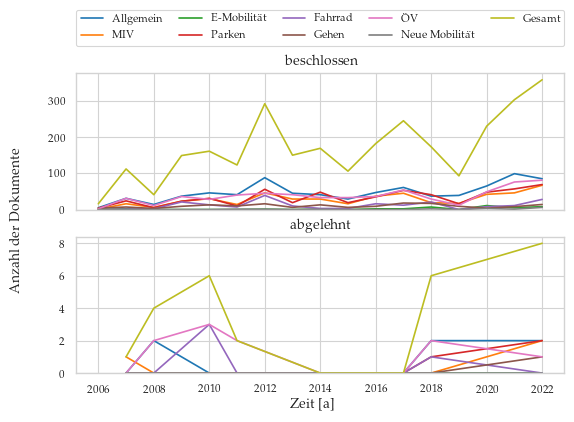

In [205]:
fig, axes = plt.subplots(2, 1, figsize=set_size(width), sharex=True)

status = ['beschlossen', 'abgelehnt']


for stat, ax in zip(status, axes.ravel()):
    df_temp = df_beschluss_lampertheim_melt[df_beschluss_lampertheim_melt['beschlussstatus'] == stat]
    sns.lineplot(x='jahr_int' ,y='value', hue='variable', data=df_temp, ax=ax)
    ax.set(xlabel='Zeit [a]', ylabel='Anzahl der Dokumente')
    ax.set_ylim(bottom=0)
    # ax.legend_.set_title(None)
    ax.set_title(stat, fontsize = 10)
    ax.get_legend().remove()
    ax.set(xlabel=None, ylabel=None)

bb = (fig.subplotpars.left, fig.subplotpars.top+0.07, 
      fig.subplotpars.right-fig.subplotpars.left,.1)
# fig.autofmt_xdate()
axes[0].legend(bbox_to_anchor=bb, mode="expand", loc="lower left",
               ncol=5, borderaxespad=0., bbox_transform=fig.transFigure)
plt.style.use('tex.mplstyle')
fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Anzahl der Dokumente', fontsize=10)




fig.savefig('../../latex/Figures/plots/pattern_matching_beschluss_lampterheim.pdf', format='pdf', bbox_inches='tight')

In [288]:
df_beschluss_total_year_status = df_beschluss_total_year[df_beschluss_total_year['beschlussstatus'] == 'abgelehnt'].set_index('jahr')[stichwortgruppen].reset_index()

In [289]:
df_beschluss_total_year_status

,jahr,Allgemein,MIV,E-Mobilität,Parken,Fahrrad,Gehen,ÖV,Neue Mobilität
0,2002,0,0,0,0,0,0,0,0
1,2003,0,0,0,0,0,0,0,0
2,2005,0,0,0,0,0,0,0,0
3,2007,0,1,0,0,0,0,0,0
4,2008,2,0,0,0,0,0,2,0
5,2009,0,0,0,0,0,0,0,0
6,2010,2,0,0,0,3,0,4,0
7,2011,2,1,0,0,0,2,3,0
8,2012,1,2,0,3,0,1,2,0
9,2013,0,1,0,0,0,0,1,0


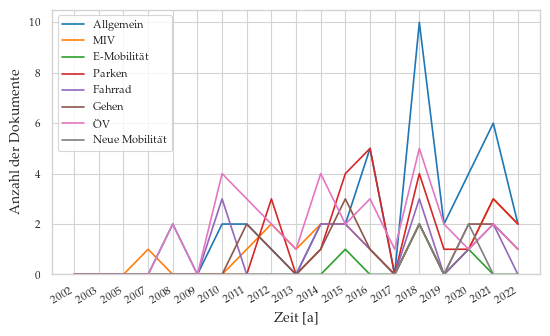

In [291]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

sns.lineplot(x='jahr' ,y='value', data=pd.melt(df_beschluss_total_year_status, id_vars='jahr'), hue='variable')
ax.set(xlabel='Zeit [a]', ylabel='Anzahl der Dokumente')

ax.set_ylim(bottom=0)
ax.legend_.set_title(None)
fig.autofmt_xdate()
plt.style.use('tex.mplstyle')

fig.savefig('../../latex/Figures/plots/pattern_matching_beschluss_abgelehnt.pdf', format='pdf', bbox_inches='tight')

In [336]:
df_beschluss_total_year_status = df_beschluss_total_year[df_beschluss_total_year['beschlussstatus'] == 'beschlossen']
fig = px.line(df_beschluss_total_year_status,
              x='jahr',
              y=stichwortgruppen,
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              # line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

In [337]:
df_beschluss_total_year_status = df_beschluss_total_year[df_beschluss_total_year['beschlussstatus'] == 'abgelehnt']
fig = px.line(df_beschluss_total_year_status,
              x='jahr',
              y=stichwortgruppen,
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen"},
              # line_shape="spline", 
              render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

In [338]:
# df = pd.read_parquet("data/raw/2023-06-17_gesamtedaten_rhein_neckar.parquet")

In [339]:
# Welche Dokumente beinhalten ein Verkehrsthema (True oder False)?
df['stichwort_verkehr'] = [any(row) for row in df_slim_count[stichwortgruppen].to_numpy()]

In [308]:
df.to_parquet("data/raw/2023-07-10_gesamtedaten_rhein_neckar.parquet")